Quick and dirty script to plot Raman spectra from the txt output from the Renishaw WiRE software, with a linear background subtraction and a basic peak scan (using peakutils).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import peakutils as pk
import numpy as np

Set path and filename of Raman spectrum, and read the data to a pandas dataframe. Headings in the text file with spurious #'s are replaced.

In [2]:
filename="~/Nextcloud/Documents/Raman/raman_20180327/D2651_1.txt"
# read raman spectrum in to pandas dataframe
rspec=pd.read_csv(filename, sep='\s+')
# change column names to not have hash in them
rspec.columns=['Wavelength','Intensity']

An extremely basic background correction is applied by taking minima from the first and last 10 datapoints, and fitting a background as a line between these two points. This only works for spectra with simple, sloping backgrounds.

In [3]:
# Extremely basic background subtraction
# find minima at upper and lower ends of range
minlow=min(rspec.Intensity[0:10])
minhigh=min(rspec.Intensity[len(rspec)-10:len(rspec)])
    
# simple linear background
diffbg=minhigh-minlow
gradbg=diffbg/len(rspec)

bg=[]
bg=np.array(bg)
    
for i in range(0,len(rspec)):
    bg=np.append(bg, minlow+i*gradbg)
    
# subtract background from data
rspec.Intensity=rspec.Intensity-bg

Quick peak search using peakutils. Tweak the threshold and min_dist as necessary. Fitting peaks to a Gaussian using lmfit would be a more thorough way of doing this.

In [4]:
indexes=pk.indexes(rspec.Intensity, thres=0.2, min_dist=5)

Plot spectrum and peak positions.

Text(0,0.5,'Intensity')

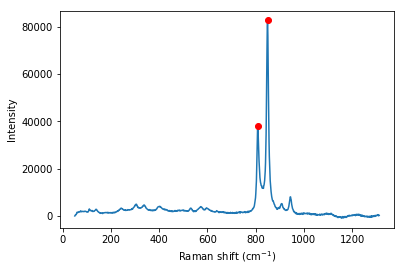

In [5]:
plt.figure()
plt.plot(rspec.Wavelength,rspec.Intensity)
plt.plot(rspec.Wavelength[indexes],rspec.Intensity[indexes], 'ro')
plt.xlabel("Raman shift (cm$^{-1}$)")
plt.ylabel("Intensity")

Print wavelengths of peaks (from right to left).

In [6]:
for i in range(0,len(indexes)):
    print("Peak", i+1, ":", rspec.Wavelength[indexes[i]],rspec.Intensity[indexes[i]])

Peak 1 : 849.40625 82704.54078463055
Peak 2 : 809.2324219999999 38194.103977138904
